In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dfg= pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Banking%20Dataset%20-%20Marketing%20Targets/train.csv',delimiter=';') 
dft= pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Banking%20Dataset%20-%20Marketing%20Targets/test.csv',delimiter=';') 

In [3]:
print(dfg.isnull().sum(axis = 0))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Information about agecat
(27.625, 37.25]     38.40
(37.25, 46.875]     25.50
(46.875, 56.5]      20.24
(56.5, 66.125]       7.60
(17.923, 27.625]     6.75
(66.125, 75.75]      0.94
(75.75, 85.375]      0.52
(85.375, 95.0]       0.06
Name: agecat, dtype: float64


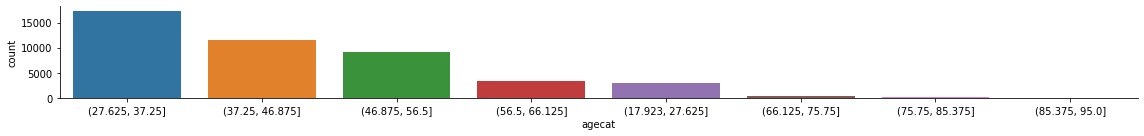

Information about job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64


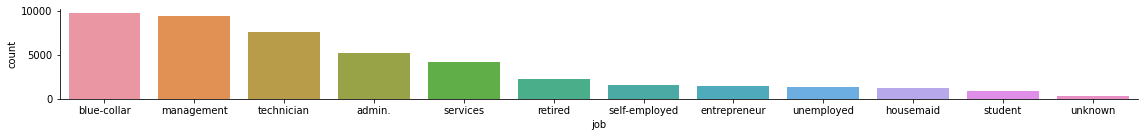

Information about marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64


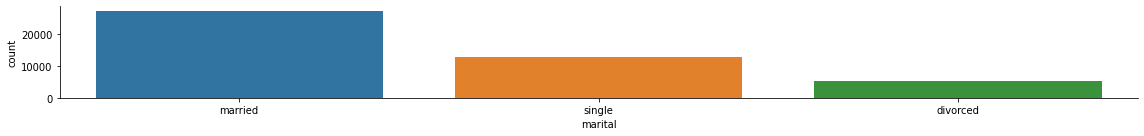

Information about education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64


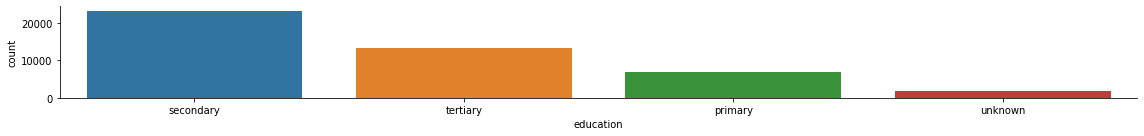

Information about default
no     98.2
yes     1.8
Name: default, dtype: float64


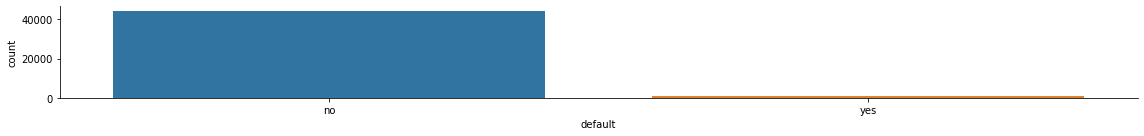

Information about balancecat
0/100      19.18
-2.5k/0     8.31
1k/1.5k     8.27
100/200     7.63
200/300     6.69
2k/3k       6.39
300/400     5.84
1.5k/2k     5.30
400/500     4.62
5k/10k      4.46
500/600     4.16
3k/4k       3.80
600/700     3.51
700/800     2.89
800/900     2.49
4k/5k       2.33
900/1k      2.28
>10k        1.83
<-2.5k      0.02
Name: balancecat, dtype: float64


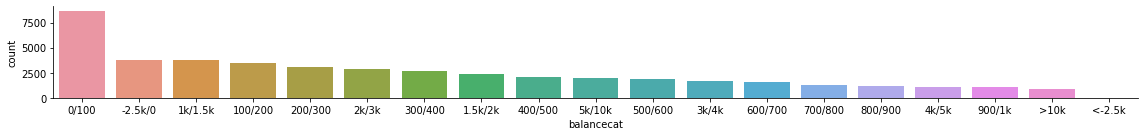

Information about housing
yes    55.58
no     44.42
Name: housing, dtype: float64


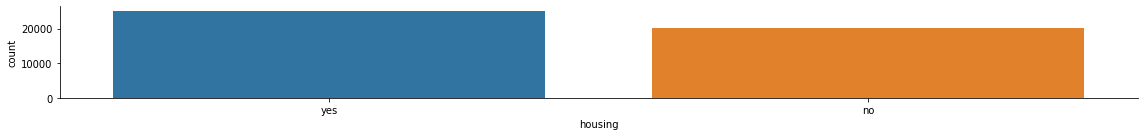

Information about loan
no     83.98
yes    16.02
Name: loan, dtype: float64


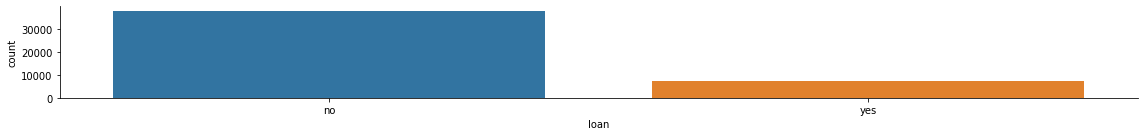

Information about contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: contact, dtype: float64


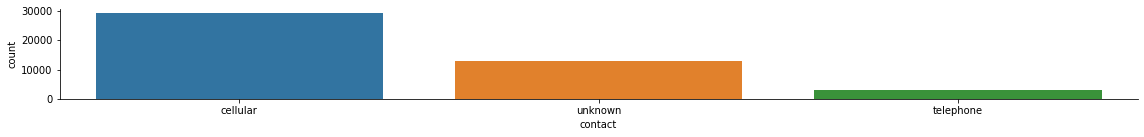

Information about daycat
20    6.09
18    5.10
21    4.48
17    4.29
6     4.27
5     4.22
14    4.09
8     4.07
28    4.05
7     4.02
19    3.89
29    3.86
15    3.77
12    3.55
13    3.51
30    3.46
9     3.45
11    3.27
4     3.20
16    3.13
2     2.86
27    2.48
3     2.39
26    2.29
23    2.08
22    2.00
25    1.86
31    1.42
10    1.16
24    0.99
1     0.71
Name: daycat, dtype: float64


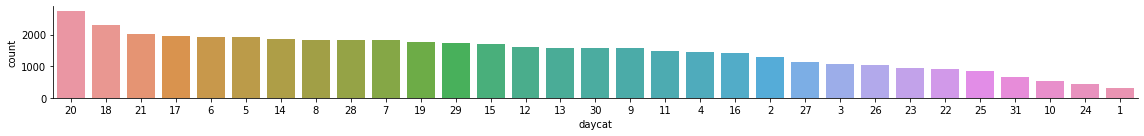

Information about month
may    30.45
jul    15.25
aug    13.82
jun    11.81
nov     8.78
apr     6.49
feb     5.86
jan     3.10
oct     1.63
sep     1.28
mar     1.06
dec     0.47
Name: month, dtype: float64


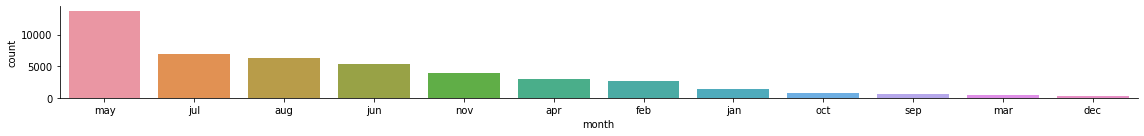

Information about durationcat
1/2    20.46
2/3    19.09
3/4    13.41
<1     10.31
>9     10.30
4/5     9.47
5/6     6.47
6/7     4.71
7/8     3.32
8/9     2.48
Name: durationcat, dtype: float64


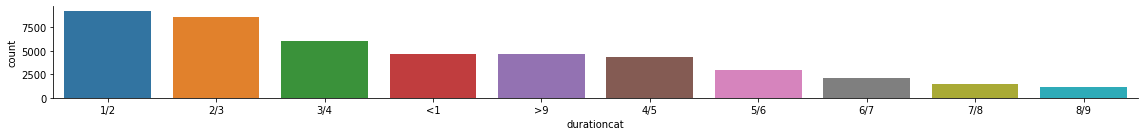

Information about campaigncat
1        38.80
2        27.66
3        12.21
4         7.79
5         3.90
6         2.86
7         1.63
10/15     1.29
8         1.19
15/20     0.72
9         0.72
10        0.59
20/25     0.32
25/30     0.17
30/35     0.09
35/40     0.03
>40       0.03
Name: campaigncat, dtype: float64


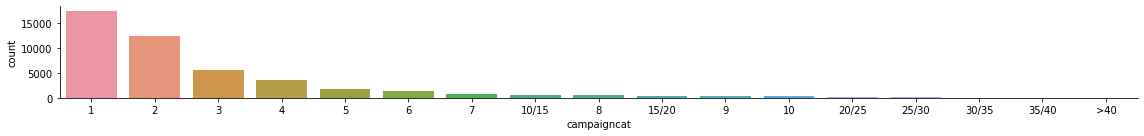

Information about pdayscat
nc         81.74
150/200     4.39
300/350     2.57
50/100      2.56
350/400     2.43
250/300     2.16
100/150     1.98
200/250     1.10
0/50        0.55
>550        0.16
450/500     0.15
400/450     0.13
500/550     0.07
Name: pdayscat, dtype: float64


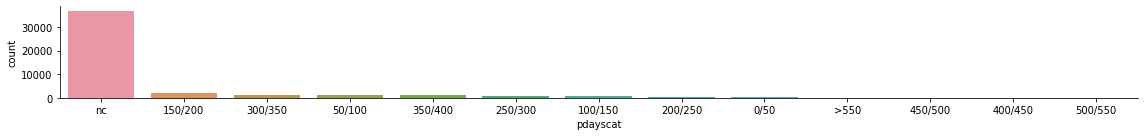

Information about previouscat
0        81.74
1         6.13
2         4.66
3         2.53
4         1.58
5         1.02
6         0.61
7         0.45
10/15     0.37
8         0.29
9         0.20
10        0.15
15/20     0.14
20/25     0.07
25/30     0.04
>40       0.01
35/40     0.01
30/35     0.01
Name: previouscat, dtype: float64


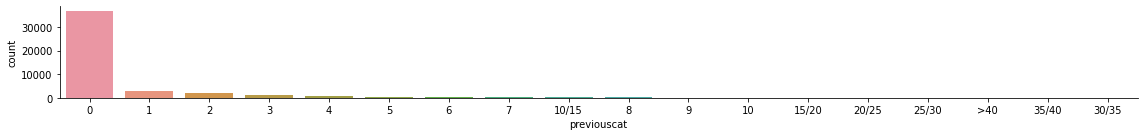

Information about poutcome
unknown    81.75
failure    10.84
other       4.07
success     3.34
Name: poutcome, dtype: float64


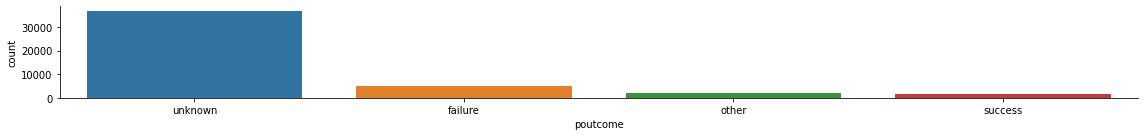

Information about y
no     88.3
yes    11.7
Name: y, dtype: float64


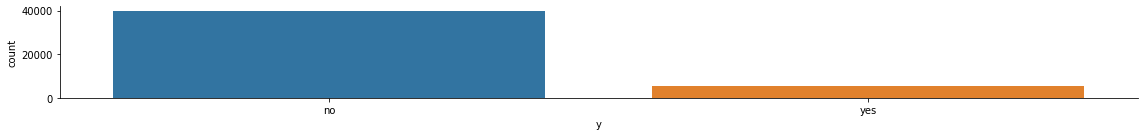

In [4]:
dfg['agecat'] = pd.cut(dfg['age'],bins=8)
dfg['daycat']=dfg['day'].astype(str)


dft['daycat']=dft['day'].astype(str)
dfg['durationmin']= dfg['duration']/60

conditions =  [(dfg['durationmin']<1),
              ((dfg['durationmin']>=1) & (dfg['durationmin']<2)),
              ((dfg['durationmin']>=2) & (dfg['durationmin']<3)),
              ((dfg['durationmin']>=3) & (dfg['durationmin']<4)),
              ((dfg['durationmin']>=4) & (dfg['durationmin']<5)),
              ((dfg['durationmin']>=5) & (dfg['durationmin']<6)),
              ((dfg['durationmin']>=6) & (dfg['durationmin']<7)),
              ((dfg['durationmin']>=7) & (dfg['durationmin']<8)),
              ((dfg['durationmin']>=8) & (dfg['durationmin']<9)),
              ((dfg['durationmin']>=9))]

values = ['<1','1/2','2/3','3/4','4/5','5/6','6/7','7/8','8/9','>9']

dfg['durationcat'] = np.select(conditions, values)

dfg.drop(columns='durationmin', inplace=True)
conditions = [(dfg['balance'] < -2500), 
              ((dfg['balance']>=-2500) & (dfg['balance']<0)), 
              ((dfg['balance']>=0) & (dfg['balance']<100)),
              ((dfg['balance']>=100) & (dfg['balance']<200)),
              ((dfg['balance']>=200) & (dfg['balance']<300)),
              ((dfg['balance']>=300) & (dfg['balance']<400)),
              ((dfg['balance']>=400) & (dfg['balance']<500)),
              ((dfg['balance']>=500) & (dfg['balance']<600)),
              ((dfg['balance']>=600) & (dfg['balance']<700)),
              ((dfg['balance']>=700) & (dfg['balance']<800)),
              ((dfg['balance']>=800) & (dfg['balance']<900)),
              ((dfg['balance']>=900) & (dfg['balance']<1000)),              
              ((dfg['balance']>=1000) & (dfg['balance']<1500)),
              ((dfg['balance']>=1500) & (dfg['balance']<2000)),
              ((dfg['balance']>=2000) & (dfg['balance']<3000)),
              ((dfg['balance']>=3000) & (dfg['balance']<4000)),
              ((dfg['balance']>=4000) & (dfg['balance']<5000)),
              ((dfg['balance']>=5000) & (dfg['balance']<10000)),
              ((dfg['balance']>=10000))]           
             

values = ['<-2.5k','-2.5k/0','0/100','100/200','200/300','300/400','400/500','500/600','600/700','700/800','800/900','900/1k','1k/1.5k','1.5k/2k','2k/3k','3k/4k','4k/5k','5k/10k','>10k']

dfg['balancecat'] = np.select(conditions, values)
conditions = [(dfg['campaign'] ==1), 
              (dfg['campaign']==2),
               (dfg['campaign']==3), 
              (dfg['campaign']==4),
               (dfg['campaign']==5),
              (dfg['campaign']==6),
               (dfg['campaign']==7),
              (dfg['campaign']==8),
               (dfg['campaign']==9),
              (dfg['campaign']==10),
              ((dfg['campaign']>10)&(dfg['campaign']<15)),
              ((dfg['campaign']>=15)&(dfg['campaign']<20)),
              ((dfg['campaign']>=20)&(dfg['campaign']<25)),
              ((dfg['campaign']>=25)&(dfg['campaign']<30)),
              ((dfg['campaign']>=30)&(dfg['campaign']<35)),
              ((dfg['campaign']>=35)&(dfg['campaign']<40)),              
              (dfg['campaign']>=40)]           
             

values = ['1','2','3','4','5','6','7','8','9','10','10/15','15/20','20/25','25/30','30/35','35/40','>40']

dfg['campaigncat'] = np.select(conditions, values)
conditions = [(dfg['pdays'] ==-1), 
              ((dfg['pdays']>0)&(dfg['pdays']<50)),
              ((dfg['pdays']>=50)&(dfg['pdays']<100)),
              ((dfg['pdays']>=100)&(dfg['pdays']<150)),
              ((dfg['pdays']>=150)&(dfg['pdays']<200)),
              ((dfg['pdays']>=200)&(dfg['pdays']<250)),
              ((dfg['pdays']>=250)&(dfg['pdays']<300)),              
              ((dfg['pdays']>=300)&(dfg['pdays']<350)), 
              ((dfg['pdays']>=350)&(dfg['pdays']<400)),
              ((dfg['pdays']>=400)&(dfg['pdays']<450)),
              ((dfg['pdays']>=450)&(dfg['pdays']<500)),
              ((dfg['pdays']>=500)&(dfg['pdays']<550)),
              (dfg['pdays']>=550)]
             

values = ['nc','0/50','50/100','100/150','150/200','200/250','250/300','300/350','350/400','400/450','450/500','500/550','>550']

dfg['pdayscat'] = np.select(conditions, values)


conditions = [(dft['pdays'] ==-1), 
              ((dft['pdays']>0)&(dft['pdays']<50)),
              ((dft['pdays']>=50)&(dft['pdays']<100)),
              ((dft['pdays']>=100)&(dft['pdays']<150)),
              ((dft['pdays']>=150)&(dft['pdays']<200)),
              ((dft['pdays']>=200)&(dft['pdays']<250)),
              ((dft['pdays']>=250)&(dft['pdays']<300)),              
              ((dft['pdays']>=300)&(dft['pdays']<350)), 
              ((dft['pdays']>=350)&(dft['pdays']<400)),
              ((dft['pdays']>=400)&(dft['pdays']<450)),
              ((dft['pdays']>=450)&(dft['pdays']<500)),
              ((dft['pdays']>=500)&(dft['pdays']<550)),
              ((dft['pdays']>550))]
             

values = ['nc','0/50','50/100','100/150','150/200','200/250','250/300','300/350','350/400','400/450','450/500','500/550', '>550']

dft['pdayscat'] = np.select(conditions, values)
conditions = [(dfg['previous'] ==1), 
              (dfg['previous']==2),
               (dfg['previous']==3), 
              (dfg['previous']==4),
               (dfg['previous']==5),
              (dfg['previous']==6),
               (dfg['previous']==7),
              (dfg['previous']==8),
               (dfg['previous']==9),
              (dfg['previous']==10),
              ((dfg['previous']>10)&(dfg['previous']<15)),
              ((dfg['previous']>=15)&(dfg['previous']<20)),
              ((dfg['previous']>=20)&(dfg['previous']<25)),
              ((dfg['previous']>=25)&(dfg['previous']<30)),
              ((dfg['previous']>=30)&(dfg['previous']<35)),
              ((dfg['previous']>=35)&(dfg['previous']<40)),              
              (dfg['previous']>=40)]           
             

values = ['1','2','3','4','5','6','7','8','9','10','10/15','15/20','20/25','25/30','30/35','35/40','>40']

dfg['previouscat'] = np.select(conditions, values)
def cat(df,c):
    for i in c:
        print('Information about', i)
        print(round((df[i].value_counts(normalize=True) * 100),2))
        sns.catplot(x = i, kind ='count', data = df, aspect = 8, height = 2, order=df[i].value_counts().index)
        plt.show()       

cat(df=dfg, c=['agecat','job','marital','education','default','balancecat','housing','loan','contact','daycat','month','durationcat','campaigncat','pdayscat','previouscat','poutcome','y'])

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

for column in dfg.columns:
    if dfg[column].dtype in ['int64', 'float64']:
        
        X = dfg[column].array.reshape(-1,1)
        
        scaler = MinMaxScaler()
        
        scaler.fit(X)

        dfg[column]=scaler.transform(dfg[column].array.reshape(-1, 1)) # Apply to train
        dft[column]=scaler.transform(dft[column].array.reshape(-1, 1)) # Apply to test
        

dfg.describe()
dft.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.300910,0.085719,0.497176,0.053672,0.028930,0.046751,0.001973
std,0.137353,0.027324,0.274922,0.052838,0.050158,0.114818,0.006158
min,0.012987,0.042725,0.000000,0.000813,0.000000,0.000000,0.000000
25%,0.194805,0.073430,0.266667,0.021147,0.000000,0.000000,0.000000
50%,0.272727,0.076834,0.500000,0.037617,0.016129,0.000000,0.000000
75%,0.402597,0.086240,0.666667,0.066897,0.032258,0.000000,0.000000
max,0.896104,0.719109,1.000000,0.615087,0.790323,1.000000,0.090909


In [6]:
for column in ['age','balance','duration','campaign','previous']:
    if dfg[column].dtype in ['int64', 'float64']:

        Q1 = dfg[column].quantile(0.25)
        Q3 = dfg[column].quantile(0.75)
        IQR = Q3 - Q1

        low= (Q1 - 1.5 * IQR)
        high = (Q3 + 1.5 * IQR)

        conditions = [ ((dfg[column] < low) | (dfg[column] > high) ) , ( (dfg[column] >= low) |  (dfg[column] <= high) ) ]         

        values = [1,0]

        dfg['out_'+str(column)] = np.select(conditions, values) 

        print(dfg['out_'+str(column)].value_counts(normalize=False))
        
        
        
for column in ['age','balance','duration','campaign','previous']:
    if dft[column].dtype in ['int64', 'float64']:

        Q1 = dft[column].quantile(0.25)
        Q3 = dft[column].quantile(0.75)
        IQR = Q3 - Q1

        low= (Q1 - 1.5 * IQR)
        high = (Q3 + 1.5 * IQR)

        conditions = [ ((dft[column] < low) | (dft[column] > high) ) , ( (dft[column] >= low) |  (dft[column] <= high) ) ]         

        values = [1,0]

        dft['out_'+str(column)] = np.select(conditions, values) 

        print(dft['out_'+str(column)].value_counts(normalize=False))

0    44724
1      487
Name: out_age, dtype: int64
0    40480
1     4731
Name: out_balance, dtype: int64
0    41976
1     3235
Name: out_duration, dtype: int64
0    42147
1     3064
Name: out_campaign, dtype: int64
0    36954
1     8257
Name: out_previous, dtype: int64
0    4477
1      44
Name: out_age, dtype: int64
0    4015
1     506
Name: out_balance, dtype: int64
0    4191
1     330
Name: out_duration, dtype: int64
0    4203
1     318
Name: out_campaign, dtype: int64
0    3705
1     816
Name: out_previous, dtype: int64


In [7]:
col_missing = ['poutcome', 'contact', 'education', 'job']

for col in col_missing:
    conditions = [dfg[col]=='unknown',dfg[col]!='unknown']           
    
    values = [1,0]    
    
    dfg[col+'_was_missing'] = np.select(conditions, values)   
    
for col in col_missing:
    conditions = [dft[col]=='unknown',dft[col]!='unknown']           
    
    values = [1,0]    
    
    dft[col+'_was_missing'] = np.select(conditions, values)  

j= 100 * len(dfg[dfg['job']=='unknown']) / dfg.shape[0]
e= 100 * len(dfg[dfg['education']=='unknown']) / dfg.shape[0]
p= 100 * len(dfg[dfg['poutcome']=='unknown']) / dfg.shape[0]
c= 100 * len(dfg[dfg['contact']=='unknown']) / dfg.shape[0]


print('The % of unknown in job is', j)
print('The % of unknown in education is', e)
print('The % of unknown in poutcome is', p)
print('The % of unknown in contact is', c)

The % of unknown in job is 0.6370131162770122
The % of unknown in education is 4.1074074893278185
The % of unknown in poutcome is 81.74780473778505
The % of unknown in contact is 28.798301298356595


In [8]:
dfg[dfg['job']=='unknown']['education'].value_counts()

unknown      127
secondary     71
primary       51
tertiary      39
Name: education, dtype: int64

In [9]:
indexNeg = dfg[(dfg['job']=='unknown') & (dfg['education']=='unknown')].index 

dfg.drop(indexNeg, inplace=True) 

In [10]:
indexNeg = dft[(dft['job']=='unknown') & (dft['education']=='unknown')].index # Creating the set of rows to be dropped

dft.drop(indexNeg, inplace=True)

In [11]:
print('Primary education JOB mode is:', dfg[dfg['education']=='primary']['job'].value_counts(normalize=True).nlargest(3))

print('Secondary education JOB mode is', dfg[dfg['education']=='secondary']['job'].value_counts(normalize=True).nlargest(3))

print('Tertiary education JOB mode is', dfg[dfg['education']=='tertiary']['job'].value_counts(normalize=True).nlargest(3))

Primary education JOB mode is: blue-collar    0.548533
retired        0.116041
housemaid      0.091519
Name: job, dtype: float64
Secondary education JOB mode is blue-collar    0.231489
technician     0.225369
admin.         0.181838
Name: job, dtype: float64
Tertiary education JOB mode is management       0.586497
technician       0.147959
self-employed    0.062627
Name: job, dtype: float64


In [12]:
dfg['job'] = np.where( ((dfg.job == 'unknown')& (dfg.education =='primary')),'blue-collar',dfg.job)


dfg['job'] = np.where( ((dfg.job == 'unknown')& (dfg.education =='tertiary')),'management',dfg.job)

import random

secjobs=['blue-collar','technician','admin.']
i=0
while i <74:
    p=random.choice(secjobs)
    dfg['job'] = np.where( ((dfg.job == 'unknown')&(dfg.education =='secondary')),p,dfg.job)
    i=i+1
    
    
    

    

dft['job'] = np.where( ((dft.job == 'unknown')& (dft.education =='primary')),'blue-collar',dft.job)


dft['job'] = np.where( ((dft.job == 'unknown')& (dft.education =='tertiary')),'management',dft.job)

import random

secjobs=['blue-collar','technician','admin.']
i=0
while i <74:
    p=random.choice(secjobs)
    dft['job'] = np.where( ((dft.job == 'unknown')&(dft.education =='secondary')),p,dft.job)
    i=i+1

In [13]:
dfg[dfg['education']=='unknown']['job'].value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [14]:
print('JOB Blue-Collar education mode is:', dfg[dfg['job']=='blue-collar']['education'].value_counts(normalize=True).nlargest(2))

print('JOB technician education mode is:', dfg[dfg['job']=='technician']['education'].value_counts(normalize=True).nlargest(2))

print('JOB management education mode is:', dfg[dfg['job']=='management']['education'].value_counts(normalize=True).nlargest(2))

print('JOB admin education mode is:', dfg[dfg['job']=='admin.']['education'].value_counts(normalize=True).nlargest(2))

print('JOB student education mode is:', dfg[dfg['job']=='student']['education'].value_counts(normalize=True).nlargest(2))

print('JOB services education mode is:', dfg[dfg['job']=='services']['education'].value_counts(normalize=True).nlargest(2))

print('JOB retired education mode is:', dfg[dfg['job']=='retired']['education'].value_counts(normalize=True).nlargest(2))

print('JOB entrepreneur education mode is:', dfg[dfg['job']=='entrepreneur']['education'].value_counts(normalize=True).nlargest(2))

print('JOB housemaid education mode is:', dfg[dfg['job']=='housemaid']['education'].value_counts(normalize=True).nlargest(2))

print('JOB self-employed education mode is:', dfg[dfg['job']=='self-employed']['education'].value_counts(normalize=True).nlargest(2))

print('JOB unemployed education mode is:', dfg[dfg['job']=='unemployed']['education'].value_counts(normalize=True).nlargest(2))

JOB Blue-Collar education mode is: secondary    0.549014
primary      0.389349
Name: education, dtype: float64
JOB technician education mode is: secondary    0.691184
tertiary     0.256651
Name: education, dtype: float64
JOB management education mode is: tertiary     0.825524
secondary    0.118037
Name: education, dtype: float64
JOB admin education mode is: secondary    0.815896
tertiary     0.110617
Name: education, dtype: float64
JOB student education mode is: secondary    0.541578
tertiary     0.237740
Name: education, dtype: float64
JOB services education mode is: secondary    0.832210
primary      0.083052
Name: education, dtype: float64
JOB retired education mode is: secondary    0.434629
primary      0.351148
Name: education, dtype: float64
JOB entrepreneur education mode is: tertiary     0.461332
secondary    0.364492
Name: education, dtype: float64
JOB housemaid education mode is: primary      0.505645
secondary    0.318548
Name: education, dtype: float64
JOB self-employed edu

In [15]:
s=['blue-collar', 'technician', 'admin.' ,'student', 'education', 'retired', 'services' ,'unemployed']
t=['management','entrepreneur','self-employed']


for job in s:
    dfg['education'] = np.where( ((dfg.education == 'unknown')& (dfg.job ==job)),'secondary',dfg.education)
    
for job in t:
    dfg['education'] = np.where( ((dfg.education == 'unknown')& (dfg.job ==job)),'tertiary',dfg.education)
    
dfg['education'] = np.where( ((dfg.education == 'unknown')& (dfg.job =='housemaid')),'primary',dfg.education)



for job in s:
    dft['education'] = np.where( ((dft.education == 'unknown')& (dft.job ==job)),'secondary',dft.education)
    
for job in t:
    dft['education'] = np.where( ((dft.education == 'unknown')& (dft.job ==job)),'tertiary',dft.education)
    
dft['education'] = np.where( ((dft.education == 'unknown')& (dft.job =='housemaid')),'primary',dft.education)

In [16]:
dfg["contact"].value_counts()

cellular     29236
unknown      12966
telephone     2882
Name: contact, dtype: int64

In [17]:
dfg['contact'] = np.where( (dfg.contact == 'unknown'),'cellular',dfg.contact)
dft['contact'] = np.where( (dft.contact == 'unknown'),'cellular',dft.contact)
dfg['contact'].value_counts()

cellular     42202
telephone     2882
Name: contact, dtype: int64

In [18]:
round(dfg['poutcome'].value_counts(normalize=True)*100,2)

unknown    81.72
failure    10.86
other       4.08
success     3.34
Name: poutcome, dtype: float64

In [19]:
dfg.drop(columns=['poutcome','poutcome_was_missing'],inplace=True)
dft.drop(columns=['poutcome','poutcome_was_missing'],inplace=True)

In [20]:
dfg.drop(columns=['day'],inplace=True)
dft.drop(columns=['day'],inplace=True)


dfg['TARGET']=dfg['y']
dft['TARGET']=dft['y']

a= dfg['TARGET']
b= dft['TARGET']

dfg.drop(columns=['TARGET','daycat','y','agecat','balancecat','durationcat','campaigncat','pdays','previouscat'],inplace=True)
dft.drop(columns=['TARGET','daycat','y','pdays'],inplace=True)

In [21]:
dfg = dfg.reset_index(drop=True)

from sklearn import preprocessing
    
def label_encoder(dfg,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(dfg[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array= ohe.fit_transform(dfg[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))
     
numerical_variables = [col for col in dfg.columns if dfg[col].dtype in ['int64', 'float64']] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

print(numerical_variables)

categorical_variables = [col for col in dfg.columns if dfg[col].dtype == 'object'] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

new_df = dfg[numerical_variables]

for column in categorical_variables:
    new_df = pd.concat([new_df,label_encoder(dfg,column)],axis=1)
        

le = preprocessing.LabelEncoder()
le.fit(a)

new_df['TARGET'] = le.transform(a)

new_df.columns

['age', 'balance', 'duration', 'campaign', 'previous', 'out_age', 'out_balance', 'out_duration', 'out_campaign', 'out_previous', 'contact_was_missing', 'education_was_missing', 'job_was_missing']


Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350'

In [22]:
dft = dft.reset_index(drop=True)

from sklearn import preprocessing
    
def label_encoder(dft,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(dft[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array= ohe.fit_transform(dft[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))
     

numerical_variables = [col for col in dft.columns if dft[col].dtype in ['int64', 'float64']] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

categorical_variables = [col for col in dft.columns if dft[col].dtype == 'object'] # Got this wise bit of code from the amazing 'Andrada Olteanu'.

new_dft = dft[numerical_variables]

for column in categorical_variables:
    new_dft = pd.concat([new_dft,label_encoder(dft,column)],axis=1)
    
    

le = preprocessing.LabelEncoder()
le.fit(b)

new_dft['TARGET'] = le.transform(b)

new_dft.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350'

In [23]:
dfg= new_df.copy()

dft= new_dft.copy()

print(dfg.shape)

print(dft.shape)

(45084, 64)
(4506, 64)


In [24]:
dfg.describe()

,age,balance,duration,campaign,previous,out_age,out_balance,out_duration,out_campaign,out_previous,...,pdayscat_250/300,pdayscat_300/350,pdayscat_350/400,pdayscat_400/450,pdayscat_450/500,pdayscat_50/100,pdayscat_500/550,pdayscat_>550,pdayscat_nc,TARGET
count,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,...,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000
mean,0.297550,0.085158,0.052496,0.028424,0.002114,0.010691,0.104583,0.071555,0.067674,0.182903,...,0.021648,0.025796,0.024399,0.001353,0.001442,0.025574,0.000732,0.001619,0.817097,0.116915
std,0.137791,0.027627,0.052376,0.049906,0.008386,0.102845,0.306018,0.257753,0.251188,0.386591,...,0.145535,0.158529,0.154286,0.036759,0.037943,0.157864,0.027045,0.040207,0.386591,0.321323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.272727,0.076871,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.389610,0.085732,0.064864,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


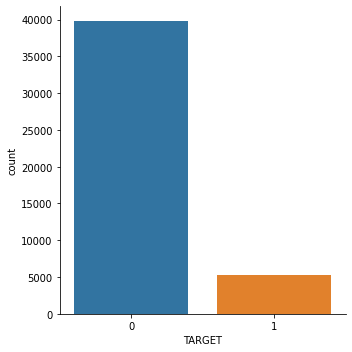

In [25]:
sns.catplot(data=dfg, x='TARGET', kind ='count')

In [26]:
correlations = dfg.corr()['TARGET'].sort_values()
correlations

pdayscat_nc           -0.166943
contact_was_missing   -0.150511
housing_yes           -0.139272
month_may             -0.102540
campaign              -0.073086
                         ...   
out_previous           0.166943
pdayscat_50/100        0.186806
out_duration           0.340086
duration               0.394545
TARGET                 1.000000
Name: TARGET, Length: 64, dtype: float64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = [LogisticRegression(solver='liblinear'),GaussianNB(),KNeighborsClassifier()]

Y = dfg['TARGET']
X = dfg.drop(columns=['TARGET'], axis=1)

from sklearn import model_selection
def train(model, x, y):
    kfold = model_selection.StratifiedKFold(n_splits=10)
    pred = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    cv_mean = pred.mean()
    
    print('Model:',model)
    
    print('CV mean: %0.3f' % (cv_mean))    

In [28]:
for model in models:
    train(model, X, Y)

Model: LogisticRegression(solver='liblinear')
CV mean: 0.806
Model: GaussianNB()
CV mean: 0.682
Model: KNeighborsClassifier()
CV mean: 0.799


In [29]:
X_train= dfg.drop(columns=['TARGET']) 

y_train = dfg['TARGET'] 

X_test = dft.drop(columns=['TARGET']) 
y_test = dft['TARGET'] 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, f1_score, roc_auc_score

def eval(model,X_train,y_train,X_test,y_test):
    
    print(model)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

        
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   

    Accuracy = round(accuracy_score(y_test, y_pred),3)

    Precision = round(precision_score(y_test, y_pred),3)

    Recall= round(recall_score(y_test, y_pred),3)

    F1=  round(f1_score(y_test, y_pred),3)    
    
    ROC_AUC=  round(roc_auc_score(y_test, y_pred),3)
    
    dict={'TN':tn, 'FP':fp, 'FN':fn, 'TP':tp, 'Ac':Accuracy, 'Pc':Precision, 'Rcll':Recall, 'F1':F1, 'roc_auc':ROC_AUC}
           
    return(dict)
eval(KNeighborsClassifier(),X_train,y_train,X_test,y_test)

KNeighborsClassifier()


{'TN': 3903,
 'FP': 85,
 'FN': 301,
 'TP': 217,
 'Ac': 0.914,
 'Pc': 0.719,
 'Rcll': 0.419,
 'F1': 0.529,
 'roc_auc': 0.699}

In [30]:
dfo= pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Banking%20Dataset%20-%20Marketing%20Targets/train.csv',delimiter=';')

a= len(dfo[dfo['y']=='yes'])/len(dfo[dfo['y']=='no'])

print("The ratio Yes/No is",round(a,3),"Yes to one No or for each Yes there is 7.42 No's")

The ratio Yes/No is 0.132 Yes to one No or for each Yes there is 7.42 No's


In [31]:
dfg.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350'

In [32]:
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(dfg[['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdayscat_0/50', 'pdayscat_100/150', 'pdayscat_150/200',
       'pdayscat_200/250', 'pdayscat_250/300', 'pdayscat_300/350',
       'pdayscat_350/400', 'pdayscat_400/450', 'pdayscat_450/500',
       'pdayscat_50/100', 'pdayscat_500/550', 'pdayscat_>550', 'pdayscat_nc']], dfg['TARGET'])

y_train_resampled.value_counts()

0    39813
1    39813
Name: TARGET, dtype: int64

In [33]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(79626, 63)
(79626,)


In [35]:
print(X_test.shape)
print(y_train.shape)

(4506, 63)
(45084,)


In [36]:
for model in models:
    train(model, X_train_resampled,y_train_resampled)

Model: LogisticRegression(solver='liblinear')
CV mean: 0.778
Model: GaussianNB()
CV mean: 0.640
Model: KNeighborsClassifier()
CV mean: 0.793


LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')


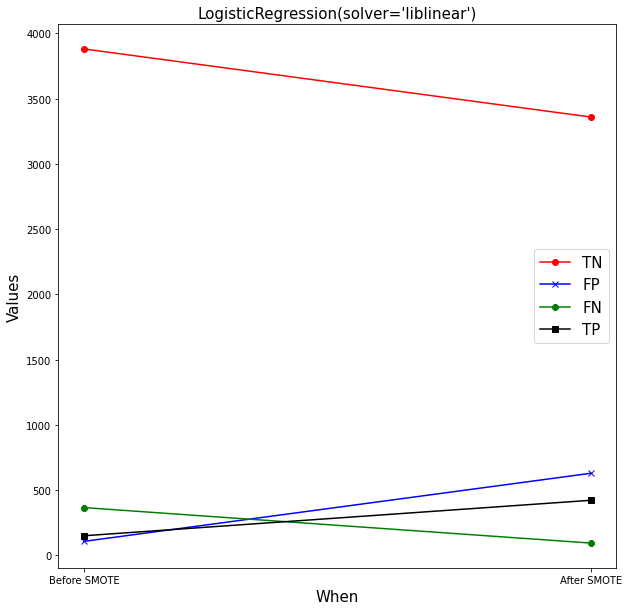

LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')
LogisticRegression(solver='liblinear')


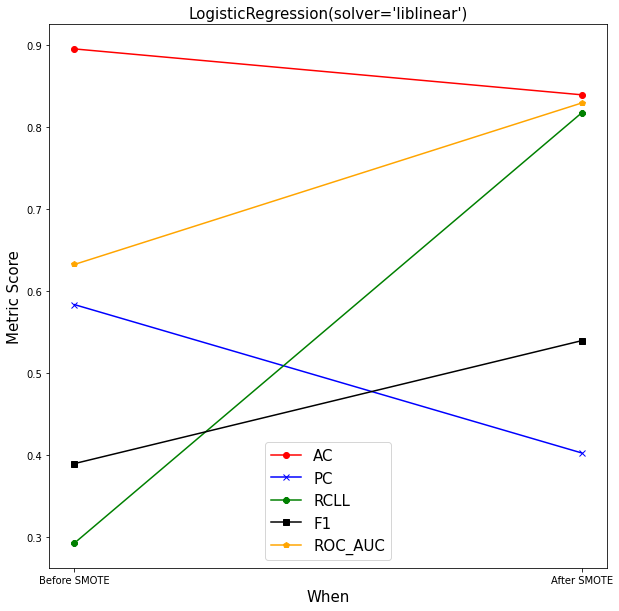

GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()


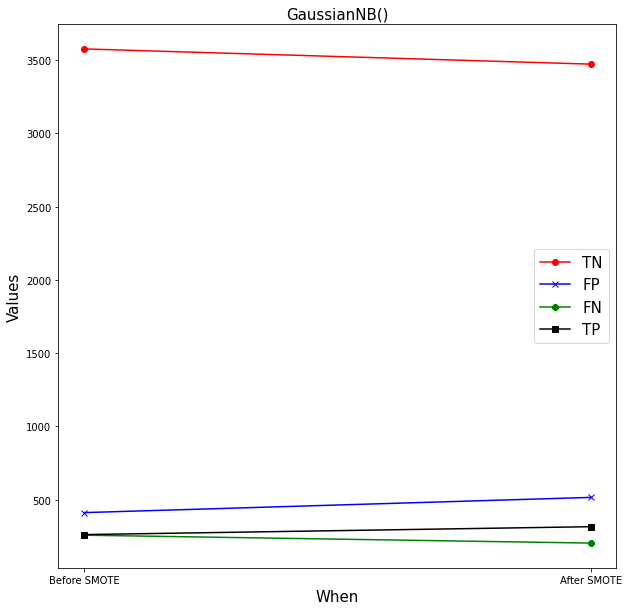

GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()
GaussianNB()


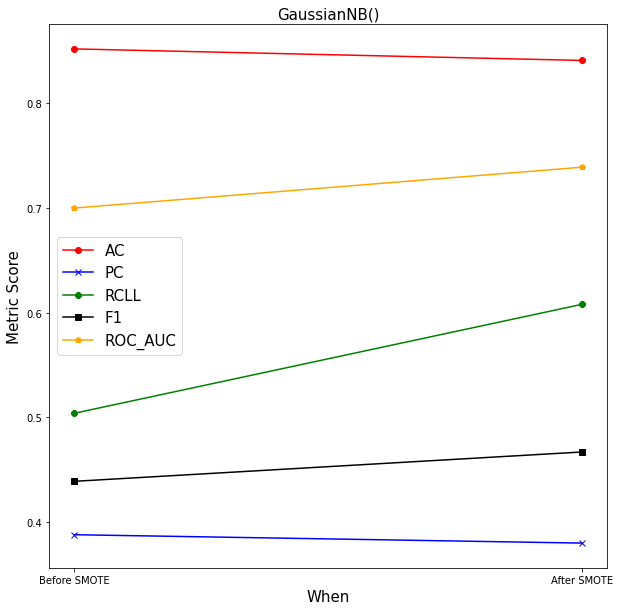

KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()


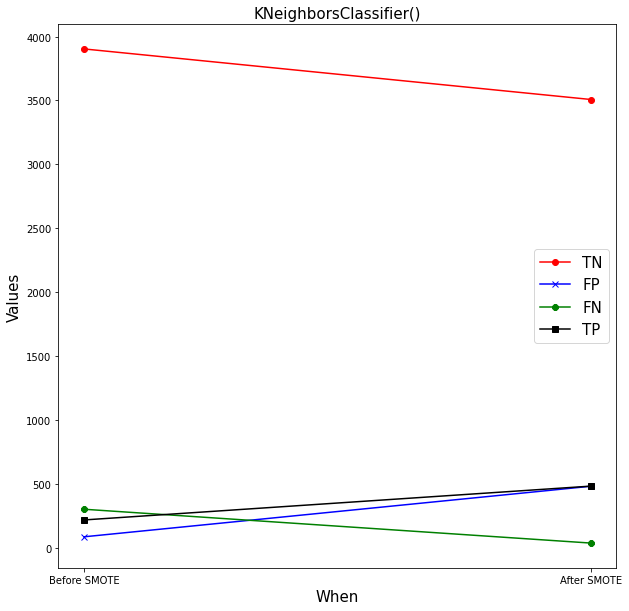

KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()
KNeighborsClassifier()


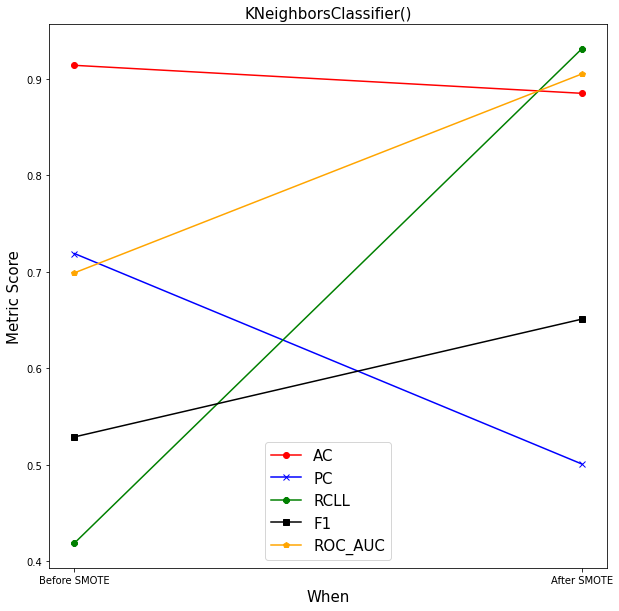

In [37]:
import matplotlib.pyplot as plt

for m in models:

    When = ['Before SMOTE','After SMOTE']

    TN= [eval(m,X_train,y_train,X_test,y_test)['TN'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['TN']]
    FP= [eval(m,X_train,y_train,X_test,y_test)['FP'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['FP']]
    FN= [eval(m,X_train,y_train,X_test,y_test)['FN'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['FN']]
    TP= [eval(m,X_train,y_train,X_test,y_test)['TP'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['TP']]
  
    plt.figure(figsize=(10, 10))
    plt.plot(When, TN, color='red', marker='o')
    plt.plot(When, FP, color='blue', marker='x')
    plt.plot(When, FN, color='green', marker='8')
    plt.plot(When, TP, color='black', marker='s')

    plt.title(m, fontsize=15)
    plt.xlabel('When', fontsize=15)
    plt.ylabel('Values', fontsize=15)
    plt.legend(['TN', 'FP','FN','TP'], fontsize=15)
    plt.show()


    When = ['Before SMOTE','After SMOTE']

    AC= [eval(m,X_train,y_train,X_test,y_test)['Ac'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['Ac']]
    PC= [eval(m,X_train,y_train,X_test,y_test)['Pc'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['Pc']]
    RCLL= [eval(m,X_train,y_train,X_test,y_test)['Rcll'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['Rcll']]
    F1= [eval(m,X_train,y_train,X_test,y_test)['F1'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['F1']]
    ROC_AUC= [eval(m,X_train,y_train,X_test,y_test)['roc_auc'], eval(m, X_train_resampled, y_train_resampled,X_test,y_test)['roc_auc']]
  
    
    plt.figure(figsize=(10, 10))
    plt.plot(When, AC, color='red', marker='o')
    plt.plot(When, PC, color='blue', marker='x')
    plt.plot(When, RCLL, color='green', marker='8')
    plt.plot(When, F1, color='black', marker='s')
    plt.plot(When, ROC_AUC, color='orange', marker='p')

    plt.title(m, fontsize=15)
    plt.xlabel('When', fontsize=15)
    plt.ylabel('Metric Score', fontsize=15)
    plt.legend(['AC', 'PC','RCLL','F1','ROC_AUC'], fontsize=15)
    plt.show()

In [38]:
eval(KNeighborsClassifier(),X_train_resampled,y_train_resampled,X_test,y_test)

KNeighborsClassifier()


{'TN': 3507,
 'FP': 481,
 'FN': 36,
 'TP': 482,
 'Ac': 0.885,
 'Pc': 0.501,
 'Rcll': 0.931,
 'F1': 0.651,
 'roc_auc': 0.905}